[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/01-Preprocesamiento.ipynb)

# Introducción al Preprocesamiento de datos

En esta notebook nos centraremos en los datos, preprocesamiento y evaluación. Dejaremos los algoritmos para sesiones posteriores.

*Lavar y picar ingredientes antes de cocinar*

Aprenderemos:

* Leer datasets.
* Preprocesamiento de datos.
* Evaluación de resultados.

En estas notebooks usaremos la siguiente notación para mejor organización.

* 🔽 Esta sección no forma parte del proceso usual de Machine Learning. Es una exploración didáctica de algún aspecto del funcionamiento del algoritmo.
* ⚡ Esta sección incluye técnicas más avanzadas destinadas a optimizar o profundizar en el uso de los algoritmos.
* ⭕ Esta sección contiene un ejercicio o práctica a realizar. Aún si no se establece una fecha de entrega, es muy recomendable realizarla para practicar conceptos clave de cada tema.

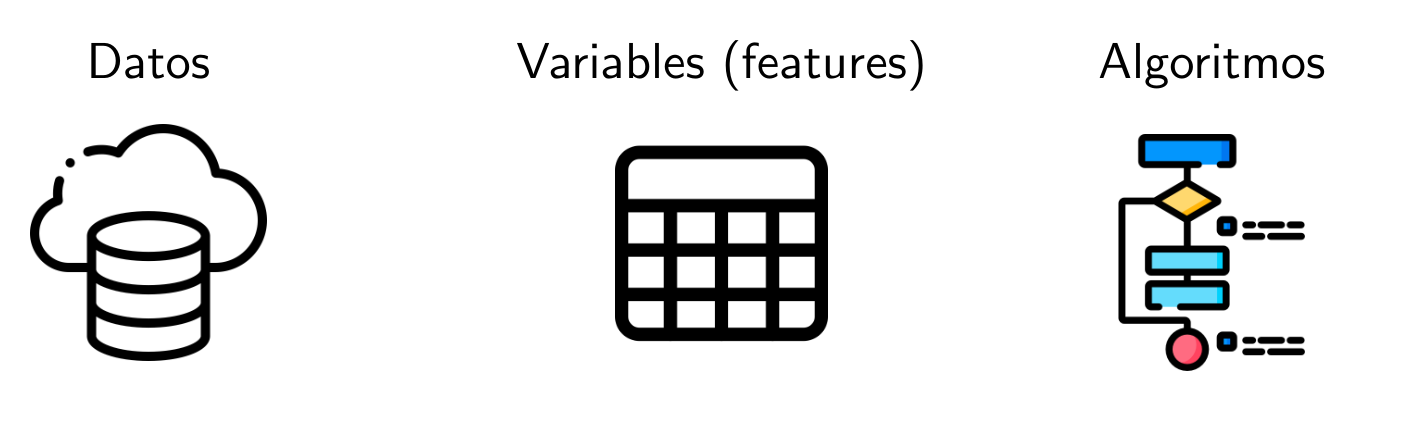

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Scikit_learn_logo.svg/621px-Scikit_learn_logo.svg.png)

**Scikit-Learn** es la librería standard para Machine Learning en Python. Este proyecto fue iniciado en 2007 por David Cournapeau como parte del Google Summer of Code. En 2010, Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort y Vincent Michel, del INRIA, tomaron las riendas del proyecto e hicieron pública la primera versión el 1 de febrero de 2010.

La librería tiene una gran cantidad de algoritmos para muchos propósitos, desde el pre-procesamiento, el entrenamiento y optimización de modelos, métricas de desempeño, funciones de pérdida, etc. Las diferentes clases tiene un uso estandarizado e interactúan fácilmente entre ellas.

Guía de uso: https://scikit-learn.org/stable/user_guide.html

Documentación: https://scikit-learn.org/stable/

In [91]:
import sklearn

**Referencias**

* Flach, P. A., 2012. Machine Learning : the Art and Science of Algorithms That Make Sense of Data. Cambridge University Press.

* Müller, A. C., \& Guido, S., 2016. Introduction to Machine Learning with Python: a Guide for Data Scientists. O'Reilly Media, Inc..

* García, S., Luengo, J., & Herrera, F., 2015. Data preprocessing in data mining (pp. 195-243). Cham, Switzerland: Springer International Publishing.

# Leyendo la información

El **preprocesamiento** de datos dentro de la Ciencia de Datos es FUNDAMENTAL.

Según el Foro Económico Mundial, **¡para 2025 generaremos alrededor de 463 exabytes (463 milliones de TB) de datos a nivel mundial por día!**. Entonces, deberiamos preguntarnos

*   ¿todos los datos son adecuados para ser utilizados por los algoritmos de aprendizaje automático?
*   ¿Cómo decidimos eso?

El **preprocesamiento** es el primer paso a realizarse antes de comenzar a aprender cualquier tipo de modelo, ya que la calidad de los datos y la información útil que puede derivarse de estos afectará directamente la capacidad de nuestros modelos.

**Garbage In, Garbage Out**

Cuando hablamos de datos, generalmente pensamos en conjuntos de datos en **forma  tabular o tablas de excel** (filas y columnas) con valores que una computadora es capáz de asimilar (números continuos) y sin datos faltantes.



---



En esta primer parte nos concentramos en leer datasets, lo cual ya han hecho durante algunas veces en los módulos anteriores.



*   Primero leemos un dataset en forma tabular, usando `pandas`.
*   Después damos dos ejemplos de cómo leer datasets que no están en forma tabular, en concreto: un dataset de imágenes y otro de texto.



---
### Ejemplo 1: Dataset del Titanic


Este dataset contiene información sobre los pasajeros del transatlántico RMS Titanic . Los datos incluyen una variedad de atributos demográficos y de viaje, con el objetivo de predecir si un pasajero sobrevivió o no al hundimiento del barco.

El conjunto de datos consta de 891 pasajeros (filas) y 6 variables seleccionadas (en total 6 columnas), entre ellas tanto variables explicativas (predictoras) como la variable objetivo (sobrevivencia). Las variables incluyen características numéricas (como la edad y la tarifa del boleto) y categóricas (como el sexo, clase de pasajero y puerto de embarque).

Este dataset es ampliamente utilizado en comunidades educativas y de ciencia de datos por su equilibrio entre simplicidad y riqueza informativa.

Más información:
* https://www.kaggle.com/datasets/zhangxuanxuan/titanicdatasets
* https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv

In [92]:
import pandas as pd
from google.colab import data_table
import seaborn as sns

df1 = sns.load_dataset('titanic')[['age', 'sex', 'pclass', 'fare', 'embarked', 'survived']]

print(df1.shape)
data_table.DataTable(df1, include_index=True, num_rows_per_page=10)

(891, 6)


,age,sex,pclass,fare,embarked,survived
0,22.0,male,3,7.2500,S,0
1,38.0,female,1,71.2833,C,1
2,26.0,female,3,7.9250,S,1
3,35.0,female,1,53.1000,S,1
4,35.0,male,3,8.0500,S,0
...,...,...,...,...,...,...
886,27.0,male,2,13.0000,S,0
887,19.0,female,1,30.0000,S,1
888,NaN,female,3,23.4500,S,0
889,26.0,male,1,30.0000,C,1


De acuerdo a la información del dataset, las variables son:

* **age**: continuous (edad del pasajero).
* **sex**: male, female (género del pasajero).
* **pclass**: 1, 2, 3 (clase de ticket, también representa el nivel socioeconómico).
* **fare**: continuous (tarifa pagada por el pasajero).
* **embarked**: S, C, Q (puerto de embarque: Southampton, Cherbourg, Queenstown).
* **survived**: 0, 1 (variable objetivo: si el pasajero sobrevivió o no, donde 1 = sobrevivió).

## ¿Qué pasa cuando la información no se encuentra en formato de tabla

Si bien mucha información se encuentra en un formato tabular o algún otro compatible, no siempre es el caso.

Los datos pueden tener muchas formas diferentes:
* tablas estructuradas
* imágenes
* texto
* archivos de audio
* archivos de video

Las máquinas no son capaces de procesar directamente datos en formatos como texto, imagen o video. Por sí solas, estas representaciones carecen de significado para los algoritmos de aprendizaje automático. Por ello, no basta con presentar un conjunto de imágenes en forma de diapositivas y esperar que el modelo interprete y aprenda de ellas automáticamente. Es necesario transformar estos datos en una forma comprensible para los algoritmos, mediante técnicas de preprocesamiento y representación adecuadas.

Veamos un par de ejemplos.


### Ejemplo 2: Imágenes

¿Cómo podemos representarla para que una modelo entienda una imagen como un conjunto de features o variables independientes?

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Leemos el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Observar que el conjunto de datos es un tensor tridimensional en lugar de ser un arreglo bidimensional de datos.

In [94]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Inspeccionemos el primer ejemplo:

In [95]:
print(X_train[0].shape)
print(X_train[0])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

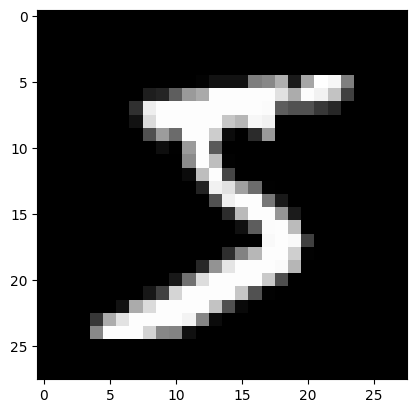

In [96]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.show()

### Ejemplo 3: Texto

El enfoque más básico para trabajar con texto es el módelo *bolsa de palabras* (*Bag of words*). Una implementación la encontramos en https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Comenzamos con un conjunto de tres textos

In [97]:
docs = ["Mirabai has won a silver medal in weight lifting in Tokyo olympics 2021",
        'Sindhu has won a bronze medal in badminton in Tokyo olympics',
        'Indian hockey team is in top four team in Tokyo olympics 2021 after 40 years']

In [98]:
len(docs)

3

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

# La clase que hará la bolsa de palabras
vectorizer = CountVectorizer()

# Construimos la bolsa de palabras
bag = vectorizer.fit_transform(docs)

# Imprimimos las palabras del vocabulario
print(vectorizer.get_feature_names_out())

# Un diccionario con el índice de cada palabra
print(vectorizer.vocabulary_)

# La matriz de features
matriz = bag.toarray()
print(matriz)
print(f"Shape de la matriz {matriz.shape}")

['2021' '40' 'after' 'badminton' 'bronze' 'four' 'has' 'hockey' 'in'
 'indian' 'is' 'lifting' 'medal' 'mirabai' 'olympics' 'silver' 'sindhu'
 'team' 'tokyo' 'top' 'weight' 'won' 'years']
{'mirabai': 13, 'has': 6, 'won': 21, 'silver': 15, 'medal': 12, 'in': 8, 'weight': 20, 'lifting': 11, 'tokyo': 18, 'olympics': 14, '2021': 0, 'sindhu': 16, 'bronze': 4, 'badminton': 3, 'indian': 9, 'hockey': 7, 'team': 17, 'is': 10, 'top': 19, 'four': 5, 'after': 2, '40': 1, 'years': 22}
[[1 0 0 0 0 0 1 0 2 0 0 1 1 1 1 1 0 0 1 0 1 1 0]
 [0 0 0 1 1 0 1 0 2 0 0 0 1 0 1 0 1 0 1 0 0 1 0]
 [1 1 1 0 0 1 0 1 2 1 1 0 0 0 1 0 0 2 1 1 0 0 1]]
Shape de la matriz (3, 23)


In [100]:
import pandas as pd
from google.colab import data_table

df = pd.DataFrame(matriz, columns=vectorizer.get_feature_names_out())
data_table.DataTable(df, include_index=True, num_rows_per_page=10)

,2021,40,after,badminton,bronze,four,has,hockey,in,indian,...,mirabai,olympics,silver,sindhu,team,tokyo,top,weight,won,years
0,1,0,0,0,0,0,1,0,2,0,...,1,1,1,0,0,1,0,1,1,0
1,0,0,0,1,1,0,1,0,2,0,...,0,1,0,1,0,1,0,0,1,0
2,1,1,1,0,0,1,0,1,2,1,...,0,1,0,0,2,1,1,0,0,1


⭕ Prueba la codificación anterior con un dataset que consista en algunos textos escritos por tí. Observa dos cosas:

1.   ¿Qué pasa con las stopwords eliminadas en español? Es decir, ¿qué efecto tiene el dejarlas o quitarlas en la matriz de datos?
2.   ¿La vectorización anterior distingue mayúsculas y minúsculas?

Puedes apoyarte en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

# Preprocesamiento de datos

En cualquier proceso de Machine Learning, el preprocesamiento (PP) es el paso en el que los datos se transforman o codifican para llevarlos a un estado tal que ahora la máquina pueda analizarlos fácilmente.

Estos son algunos de los tipos de problemas básicos así como la familia de técnicas de PP a la que pertenecen:
* ¿Cómo limpio los datos? ***Limpieza de datos***.
* ¿Cómo unifico y escalo los datos? ***Normalización de datos***.
* ¿Cómo proporciono datos precisos? ***Transformación de datos***.
* ¿Cómo manejo los datos faltantes? ***Imputación de datos perdidos***.
* ¿Cómo incorporo y ajusto datos? ***Integración de datos***.
* ¿Cómo detecto y manejo el ruido? ***Análisis del ruido***.

![](https://docs.google.com/uc?export=download&id=1-Dro_Qk1I63w2OAtjrFXRN2HcXMC07lo)




## Limpieza de Datos

Involucra operaciones como
* **Corrección** de datos
* **Filtrar datos** especificios o incorrectos
* **Reducir detalles** innecesarios.

Algunas veces se traslapa con otras técnicas de PP como la imputación de datos faltantes y análisis del ruido (aunque ambas categorías se ven por separado para un análisis más profundo).

Otras operaciones son la **detección de discrepancias** y **datos sucios** (fragmentos de los datos originales que no tienen sentido).

Esto típicamente requiere intervención humana ya que es necesaria la comprensión de los datos originales.

Continuamos con el ejemplo del Titanic que comenzamos arriba al inicio de la notebook:

In [101]:
import pandas as pd
from google.colab import data_table

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03%20Machine%20Learning/data/titanic_corrupted.csv"
df = pd.read_csv(url,index_col=0)
print(df.shape)
data_table.DataTable(df, include_index=True, num_rows_per_page=10)

(891, 6)


,age,sex,pclass,fare,embarked,survived
0,22.0,male,3,7.2500,S,no
1,38.0,female,1,71.2833,C,yes
2,26.0,female,3,7.9250,S,yes
3,35.0,female,1,53.1000,S,yes
4,35.0,male,3,8.0500,S,no
...,...,...,...,...,...,...
886,27.0,male,2,13.0000,S,no
887,19.0,female,1,30.0000,S,yes
888,NaN,female,3,23.4500,S,no
889,26.0,male,1,30.0000,C,yes


In [102]:
df.describe()

,age,pclass,fare
count,716.000000,891.000000,891.000000
mean,29.560293,2.308642,32.204208
std,14.699738,0.836071,49.693429
min,-12.000000,1.000000,0.000000
25%,20.000000,2.000000,7.910400
50%,28.000000,3.000000,14.454200
75%,38.000000,3.000000,31.000000
max,80.000000,3.000000,512.329200


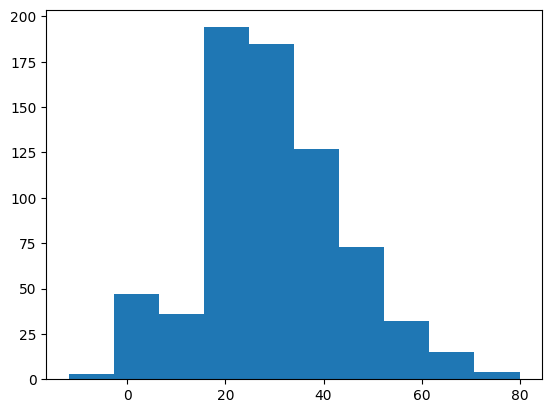

In [103]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['age'])
plt.show()

🔵 Ejercicio: Identificar y corregir datos que "no tienen sentido"

1. Quitemos los registros donde la edad es negativa.

2. Cambiemos los valores de la columna `survived` de yes/no a 1/0.

**Tarea 1**. Quitemos los registros donde la edad es negativa.

In [104]:
cantidad_negativos = df[df['age']<0].shape[0]
print(f"Cantidad de edades negativas: {cantidad_negativos}")

df = df.drop(index=df[df['age']<0].index.tolist())
df

Cantidad de edades negativas: 3


,age,sex,pclass,fare,embarked,survived
0,22.0,male,3,7.2500,S,no
1,38.0,female,1,71.2833,C,yes
2,26.0,female,3,7.9250,S,yes
3,35.0,female,1,53.1000,S,yes
4,35.0,male,3,8.0500,S,no
...,...,...,...,...,...,...
886,27.0,male,2,13.0000,S,no
887,19.0,female,1,30.0000,S,yes
888,NaN,female,3,23.4500,S,no
889,26.0,male,1,30.0000,C,yes


In [105]:
df.describe()

,age,pclass,fare
count,713.000000,888.000000,888.000000
mean,29.716928,2.306306,32.286246
std,14.528891,0.836515,49.757288
min,0.420000,1.000000,0.000000
25%,20.500000,2.000000,7.917700
50%,28.000000,3.000000,14.456250
75%,38.000000,3.000000,31.068750
max,80.000000,3.000000,512.329200


**Tarea 2**. Cambiemos los valores de la columna `survived` de yes/no a 1/0.

In [106]:
# def cambiar(x):
#     if x=='yes':
#         return 1
#     else:
#         return 0

# df['survived'] = df['survived'].apply(cambiar)

df['survived'] = df['survived'].apply(lambda x: 1 if x=='yes' else 0)
df

,age,sex,pclass,fare,embarked,survived
0,22.0,male,3,7.2500,S,0
1,38.0,female,1,71.2833,C,1
2,26.0,female,3,7.9250,S,1
3,35.0,female,1,53.1000,S,1
4,35.0,male,3,8.0500,S,0
...,...,...,...,...,...,...
886,27.0,male,2,13.0000,S,0
887,19.0,female,1,30.0000,S,1
888,NaN,female,3,23.4500,S,0
889,26.0,male,1,30.0000,C,1


Una vez que hemos terminos de descartar algunos datos podemos resetear el índice.

In [107]:
df.reset_index(inplace=True,drop=True)
df

,age,sex,pclass,fare,embarked,survived
0,22.0,male,3,7.2500,S,0
1,38.0,female,1,71.2833,C,1
2,26.0,female,3,7.9250,S,1
3,35.0,female,1,53.1000,S,1
4,35.0,male,3,8.0500,S,0
...,...,...,...,...,...,...
883,27.0,male,2,13.0000,S,0
884,19.0,female,1,30.0000,S,1
885,NaN,female,3,23.4500,S,0
886,26.0,male,1,30.0000,C,1


⭕ Ejercicio:

¿Hay valores faltantes en alguna columna? En caso de que sí lo haya, eliminaremos dichas columnas. Al final, resetear el índice.

## Imputación de datos faltantes.

Por diversas razones, muchos conjuntos de datos del mundo real contienen valores perdidos. Sin embargo, **estos conjuntos de datos son incompatibles con la mayoría de estimadores de scikit-learn**, que asumen que todos los valores de una matriz son numéricos.

Típicamente los valores faltantes están indicados como [numpy.nan](https://numpy.org/doc/stable/reference/constants.html#numpy.nan).

Hay varias **estrategias para lidiar con valores faltantes**:

* Descartar filas y/o columnas enteras que contengan valores perdidos. Sin embargo, esto tiene el precio de perder datos que pueden ser valiosos (aunque estén incompletos).
* Imputar los valores que faltan, es decir, deducirlos de la parte conocida de los datos. Por ejemplo:
    * Usar el promedio.
    * Usar la mediana.
    * Usar la moda (el valor más frecuente).
    * Usar algún valor constante.

En la mayoría de los casos, es mejor agregar una estimación razonable de un valor de datos adecuado que dejarlo en blanco.

⚡ Hay algunos patrones que se pueden presentar en los datos faltantes. Diferentes patrones pueden ser tratados con diferentes estrategias más especializadas.

<img src="https://stefvanbuuren.name/fimd/fig/ch04-patterns-1.png" width="700">

https://stefvanbuuren.name/fimd/missing-data-pattern.html




**¿Cómo exploramos los valores faltantes?**

In [108]:
# Podemos ver las filas del dataframe que tienen valores faltantes en la columna 'age':
display(df[df['age'].isnull()])

# Podemos contar las filas del dataframe que tienen valores faltantes en la columna 'age':
print(f"Cantidad de entradas nulas en 'age': {df[df['age'].isnull()].shape[0]}")

,age,sex,pclass,fare,embarked,survived
5,NaN,male,3,8.4583,Q,0
17,NaN,male,2,13.0000,S,1
19,NaN,female,3,7.2250,C,1
26,NaN,male,3,7.2250,C,0
28,NaN,female,3,7.8792,Q,1
...,...,...,...,...,...,...
856,NaN,male,3,7.2292,C,0
860,NaN,female,3,69.5500,S,0
865,NaN,male,3,9.5000,S,0
875,NaN,male,3,7.8958,S,0


Cantidad de entradas nulas en 'age': 175


In [109]:
df.isna().sum()

,0
age,175
sex,0
pclass,0
fare,0
embarked,2
survived,0


Quitemos los valores faltantes de `embarked`, son pocos.

In [110]:
df.dropna(subset=['embarked'],inplace=True)
df.reset_index(inplace=True,drop=True)
display(df.isna().sum())

,0
age,175
sex,0
pclass,0
fare,0
embarked,0
survived,0


Hagamos la imputación de valores faltantes en la columna `age`. Para esto usaremos scikit-learn, el cual tiene un [submódulo](https://scikit-learn.org/stable/modules/impute.html) para hacer imputación. Usaremos la clase [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [111]:
df.shape

(886, 6)

In [112]:
from sklearn.impute import SimpleImputer

age_values = df['age'].values  # Recolectamos los valores de la columna en un arreglo de numpy

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
age_new_values = imp.fit_transform(age_values.reshape(-1,1))
age_new_values

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.65987342],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.65987342],
       [31.        ],
       [29.65987342],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.65987342],
       [19.        ],
       [29.65987342],
       [29.65987342],
       [40.        ],
       [29.65987342],
       [29.65987342],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.65987342],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.65987342],
       [ 3.        ],
       [19.        ],
       [29

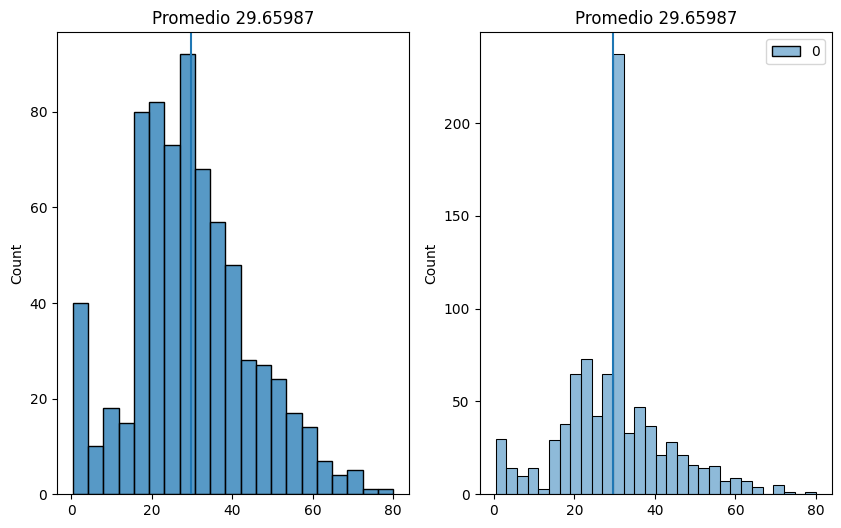

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title(f"Promedio {round(np.nanmean(age_values),5)}")
sns.histplot(age_values)
plt.axvline(x=np.nanmean(age_values))
plt.subplot(1,2,2)
sns.histplot(age_new_values)
plt.title(f"Promedio {round(np.mean(age_new_values),5)}")
plt.axvline(x=np.mean(age_new_values))
plt.show()

¿Cómo son ambos promedios?

❓ ¿Por qué son iguales?

Regresemos la nueva columna al dataframe original

In [114]:
df['age'] = age_new_values
df

,age,sex,pclass,fare,embarked,survived
0,22.000000,male,3,7.2500,S,0
1,38.000000,female,1,71.2833,C,1
2,26.000000,female,3,7.9250,S,1
3,35.000000,female,1,53.1000,S,1
4,35.000000,male,3,8.0500,S,0
...,...,...,...,...,...,...
881,27.000000,male,2,13.0000,S,0
882,19.000000,female,1,30.0000,S,1
883,29.659873,female,3,23.4500,S,0
884,26.000000,male,1,30.0000,C,1


Comprobemos que ya no hay entradas faltantes en esa columna

In [115]:
df[df['age'].isnull()]

,age,sex,pclass,fare,embarked,survived


También funciona para valores categóricos, aunque sólo en las estrategias `most_frequent` y `constant`.

In [116]:
# imp_categorico = SimpleImputer(missing_values='?', strategy='most_frequent')
# A4_new_values = imp_categorico.fit_transform(df['embarked'].values.reshape(-1,1))

## Discretización

⚡ Hagamos binning (discretización):

In [117]:
df_disc = df.copy()
df_disc['age_group'] = pd.cut(df_disc['age'],
                         bins=[0, 12, 64, 99],
                         labels=['kid', 'adult', 'elder'])
df_disc

,age,sex,pclass,fare,embarked,survived,age_group
0,22.000000,male,3,7.2500,S,0,adult
1,38.000000,female,1,71.2833,C,1,adult
2,26.000000,female,3,7.9250,S,1,adult
3,35.000000,female,1,53.1000,S,1,adult
4,35.000000,male,3,8.0500,S,0,adult
...,...,...,...,...,...,...,...
881,27.000000,male,2,13.0000,S,0,adult
882,19.000000,female,1,30.0000,S,1,adult
883,29.659873,female,3,23.4500,S,0,adult
884,26.000000,male,1,30.0000,C,1,adult


<ipython-input-118-a1af0e5ec3f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_disc, x='age_group', palette='viridis')


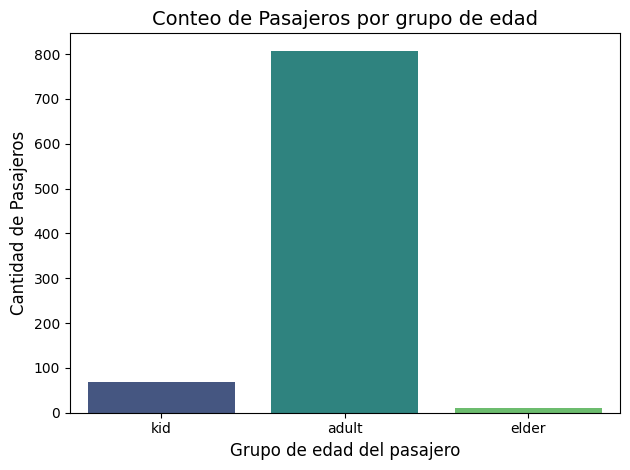

In [118]:
plt.figure()
sns.countplot(data=df_disc, x='age_group', palette='viridis')

plt.title('Conteo de Pasajeros por grupo de edad', fontsize=14)
plt.xlabel('Grupo de edad del pasajero', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)

plt.tight_layout()
plt.show()

## Re-escalamiento de los Datos.

La unidad de medida utilizada puede afectar el análisis de datos.

>> Por ejemplo: típicamente los datos atmosféricos en Cuernavaca, reflejan una  temperatura acotada entre 8 a 40 °C, mientras que la presión atmosférica esta data entre 950 a 1050 mbar.  
>> * ¿Qué variable predomina más?
>> * ¿Qué cambio produce un mayor efecto, una diferencia de 5°C de temperatura o 5 mbar de presión?

**La normalización de los datos intenta dar a todos los atributos el mismo peso, expresando cada variable en las mismas unidades de medida y así como una escala en común (determinada).**

Se trata de re-escalar el intervalo en el que se encuentran los datos al intervalo $[0,1]$ (o cualquier otro).

⚡ Una de las raíces de las dificultades que se presentan al tener escalas de valores muy diferentes es el **error de absorción**:

In [119]:
eps = 0.0000000000001
x0 = 100000
num_iteraciones = 10000

for k in range(num_iteraciones):
    x0 += eps
print(f"Estrategia 1: {x0}")

x_final = x0 + num_iteraciones*eps
print(f"Estrategia 2: {x_final}")

Estrategia 1: 100000.0
Estrategia 2: 100000.000000001


Veamos la escala de datos de las variables continuas

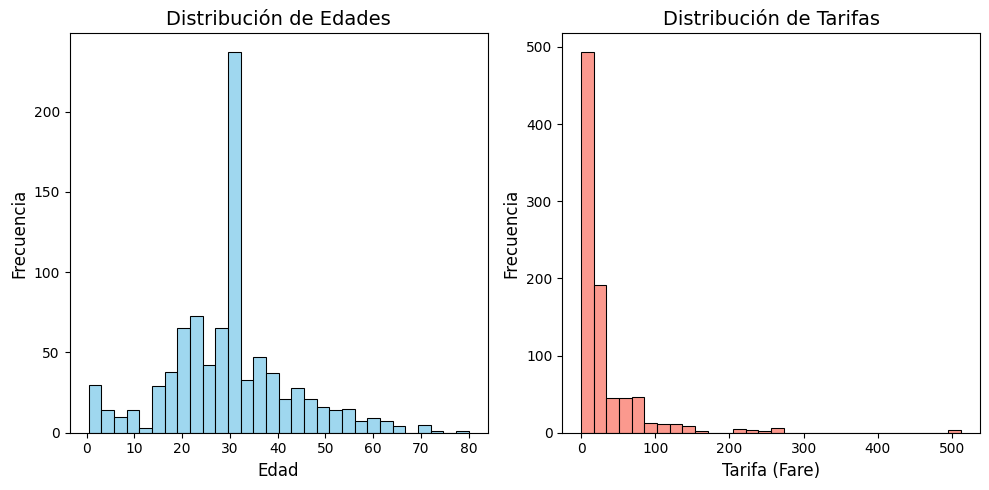

In [120]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'].values, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Distribución de Edades', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(df['fare'].values, bins=30, color='salmon', edgecolor='black', alpha=0.8)
plt.title('Distribución de Tarifas', fontsize=14)
plt.xlabel('Tarifa (Fare)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.tight_layout()
plt.show()

Continuamos con la normalización de datos. Usaremos el módulo `preprocessing` de Scikit-Learn.

In [121]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['age','fare']])
scaled_values

array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       ...,
       [0.36742741, 0.04577135],
       [0.32143755, 0.0585561 ],
       [0.39683338, 0.01512699]])

In [122]:
scaler2 = StandardScaler()
scaler2.fit(df[['age','fare']])
scaled_values2 = scaler2.transform(df[['age','fare']])
scaled_values2

array([[-5.90310094e-01, -5.01241375e-01],
       [ 6.42733977e-01,  7.86284442e-01],
       [-2.82049076e-01, -4.87669063e-01],
       ...,
       [-2.73790784e-16, -1.75505887e-01],
       [-2.82049076e-01, -4.38041928e-02],
       [ 1.80342451e-01, -4.91187811e-01]])

In [123]:
df.loc[:,['age','fare']] = scaled_values
df

,age,sex,pclass,fare,embarked,survived
0,0.271174,male,3,0.014151,S,0
1,0.472229,female,1,0.139136,C,1
2,0.321438,female,3,0.015469,S,1
3,0.434531,female,1,0.103644,S,1
4,0.434531,male,3,0.015713,S,0
...,...,...,...,...,...,...
881,0.334004,male,2,0.025374,S,0
882,0.233476,female,1,0.058556,S,1
883,0.367427,female,3,0.045771,S,0
884,0.321438,male,1,0.058556,C,1


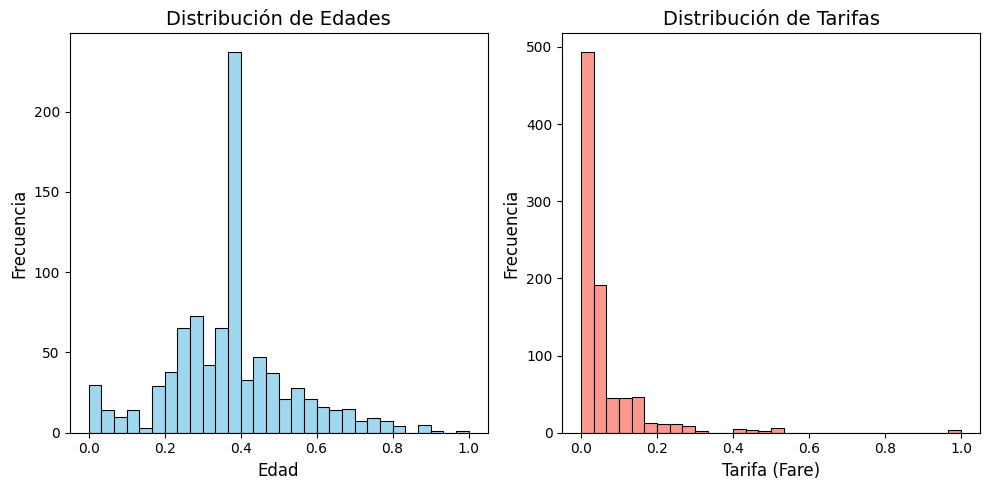

In [124]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'].values, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Distribución de Edades', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(df['fare'].values, bins=30, color='salmon', edgecolor='black', alpha=0.8)
plt.title('Distribución de Tarifas', fontsize=14)
plt.xlabel('Tarifa (Fare)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.tight_layout()
plt.show()

## Transformación de Datos

En este paso los datos se **convierten o consolidan** para que el resultado del modelado sea más *eficiente/efectivo*.

Entre las técnicas de transformación de datos se encuentra
* el **suavizamiento**.
* **construcción de características**.
* **agregación o resumen** de datos.
* **discretización**.
* **generalización**.

Sin embargo, la mayoría de estas se pueden considerar como áreas independientes.

Las tareas que requieren supervisión humana son las técnicas clásicas de transformación de datos como:
* la generación de informes
* nuevos atributos que agregan los existentes
* generalización de conceptos, especialmente en atributos categóricos (por ejemplo, la sustitución de fechas completas por solo números de año).

🔵 Ejercicio: One-Hot Encoding

One-Hot Encoding es la transformación de variables nominales/categóricas en númericas. Esta transformación consiste en convertir cada valor $v_i$ de una variable $V$ ($v_i\in V$), en columnas. De tal suerte, que si la variable $V$ tiene tres valores ($|V|=3$), esta será reemplazada por V1, V2 y V3, en donde se pondrá un 1 si $V1 = v_i$, de otra forma 0; se aplica el mismo principio para V2 y V3.

![](https://docs.google.com/uc?export=download&id=18CttdKmICOmEvQ82JEJwQbdnxO3myjnU)


**Actividad**: Aplicar el One-Hot-Encoding a las variables A4 y A5 del conjunto de aprobación de crédito.

¿Qué valores toman las variables categóricas?

<ipython-input-125-f6111ee800d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pclass', palette='viridis')


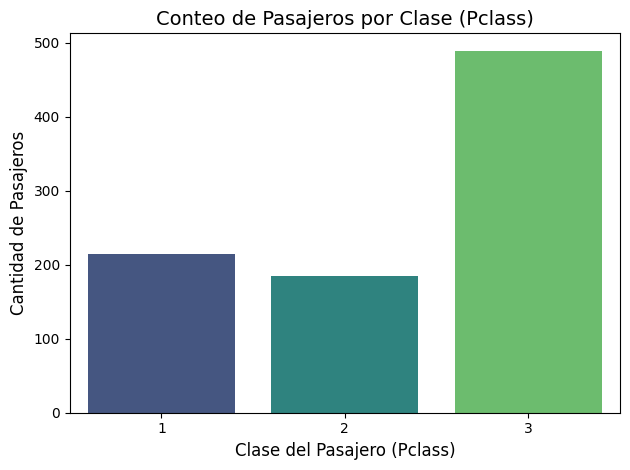

In [125]:
plt.figure()
sns.countplot(data=df, x='pclass', palette='viridis')

plt.title('Conteo de Pasajeros por Clase (Pclass)', fontsize=14)
plt.xlabel('Clase del Pasajero (Pclass)', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-126-82e0d26d888d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='viridis')


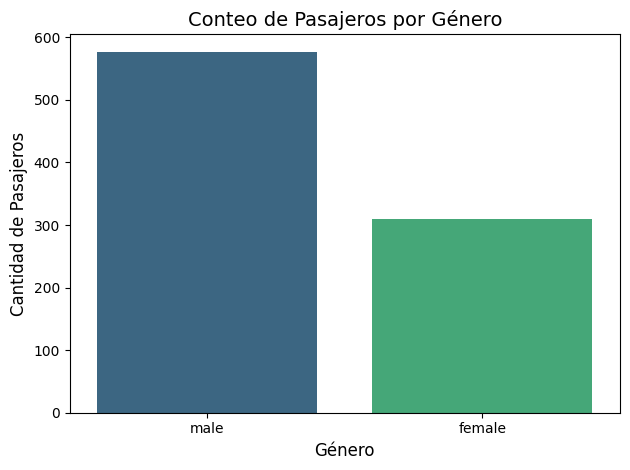

In [126]:
plt.figure()
sns.countplot(data=df, x='sex', palette='viridis')

plt.title('Conteo de Pasajeros por Género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-127-c9a21b48de8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='embarked', palette='viridis')


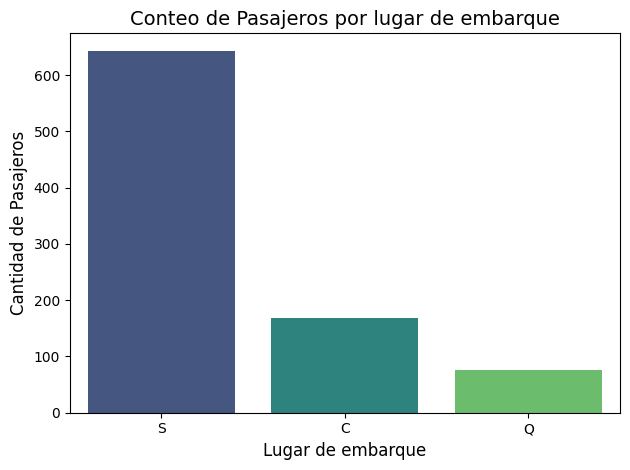

In [127]:
plt.figure()
sns.countplot(data=df, x='embarked', palette='viridis')

plt.title('Conteo de Pasajeros por lugar de embarque', fontsize=14)
plt.xlabel('Lugar de embarque', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)

plt.tight_layout()
plt.show()

In [128]:
df.head(5)

,age,sex,pclass,fare,embarked,survived
0,0.271174,male,3,0.014151,S,0
1,0.472229,female,1,0.139136,C,1
2,0.321438,female,3,0.015469,S,1
3,0.434531,female,1,0.103644,S,1
4,0.434531,male,3,0.015713,S,0


Creamos las columnas one-hot encoding con [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [129]:
categorical_columns = ['sex','embarked']
df = pd.get_dummies(df,prefix_sep='_',columns=categorical_columns)
df

,age,pclass,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0.271174,3,0.014151,0,False,True,False,False,True
1,0.472229,1,0.139136,1,True,False,True,False,False
2,0.321438,3,0.015469,1,True,False,False,False,True
3,0.434531,1,0.103644,1,True,False,False,False,True
4,0.434531,3,0.015713,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...
881,0.334004,2,0.025374,0,False,True,False,False,True
882,0.233476,1,0.058556,1,True,False,False,False,True
883,0.367427,3,0.045771,0,True,False,False,False,True
884,0.321438,1,0.058556,1,False,True,True,False,False


## Integración de Datos.

Comprende la fusión de datos de múltiples fuentes de datos.

Este proceso debe realizarse con cuidado para evitar redundancias e inconsistencias en el conjunto de datos resultante.

Las operaciones típicas logradas dentro de la integración de datos son la
* **identificación** y **unificación** de variables y dominios
* **análisis de correlación** entre atributos
* **identificación de duplicación** y **detección de conflictos** en los valores de datos de diferentes fuentes.

## Identificación de Datos Anómalos/Outliers.

El objetivo principal es detectar errores aleatorios o variaciones en una variable medida.

<img src="https://www.mdpi.com/energies/energies-12-03310/article_deploy/html/images/energies-12-03310-g002.png" width="600">




## Reducción de Datos

La **reducción de datos** comprende el conjunto de técnicas que, de una forma u otra, obtienen una representación reducida de los datos originales.

El **objetivo** de la redución de los datos es ***encontrar un sub-conjunto $C'$ tal que se aproxime al conjunto original $C$ tal que la información contenida en $C' \approx C$***. Esto típicamente significa que se mantienen la estructura esencial de los datos originales ($C$), pero la cantidad de datos se reduce.

![](https://docs.google.com/uc?export=download&id=1kJvqifJpTjT-3NjyUzdD-6EvYGPSHE3v)

Algo interesante, es que mientras el PP es fundamental, la reducción de datos puede considerarse como *opcional*. Sin embargo, existen muchas razones por las cuales este proceso es más que una sugerencia:

* Para su ejecución y de acuerdo a formulación, todos los algoritmos de ML estan sujetos a un
  * **tiempo de computo específico**
  * **memoria** específica.
  * **tamaño del conjunto de datos**

  Entonces, si el tamaño del conjunto de datos es mayor al limite de un algoritmo, el tiempo de computo se volverá **prohibitivo**.  




Feature Selection: Son las técnicas para elegir ciertas variables que mejor representen a un conjunto de datos. Podemos considerarla como una técnica de reducción de dimensionalidad.

* [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) selecciona las mejores $k$ variables de acuerdo a alguna prueba estadística.
* [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold) elimina variable con una varianza baja. Esto no se combina bien con la normalización.

En el siguiente ejemplo, descartamos la tercera coordenada:

$$(x,y,z)\mapsto (x,y)$$

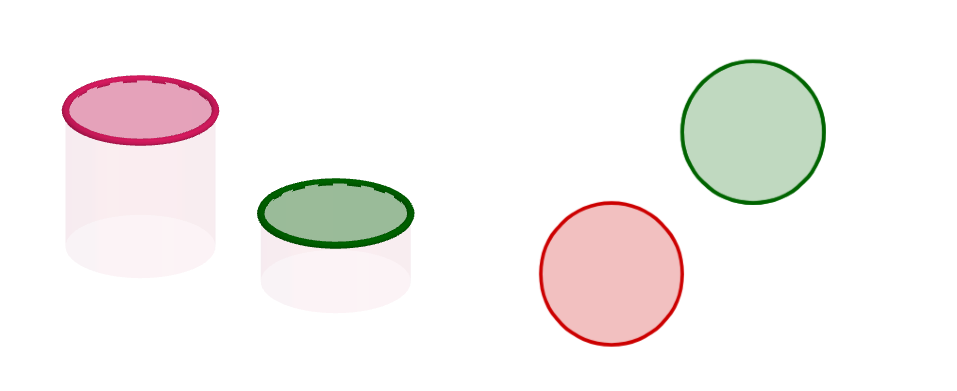

La **maldición de la dimensionalidad** describe cómo el comportamiento de los datos cambia drásticamente al aumentar el número de dimensiones (variables).

- El **espacio de características** incluye todas las combinaciones posibles (reales o no) de valores que pueden tomar las variables del problema.


- Con 1 variable $ x_1 \in [0,1] $:  
  Conocer 1/3 del rango cubre el 33% del espacio posible.

  ![](https://docs.google.com/uc?export=download&id=1DCqkNuAH2Dc32HOz04aBBekn8nAk1zHH)

- Con 2 variables $ x_1, x_2 \in [0,1] $:  
  Conocer 1/3 del rango en cada variable cubre solo el 11% (1/9) del espacio total.

  ![](https://docs.google.com/uc?export=download&id=18wZ8GWiQNYnZMGvIKyAvSqyT1dfDE_lK)

- Con 3 variables:  
  Cubre apenas el 4% (1/27) del espacio total.

  ![](https://docs.google.com/uc?export=download&id=1rBP3TXW2SjowCslJOEa9SN0RlOdwir90)

Si continuamos con esta exploración:

<img src="https://docs.google.com/uc?export=download&id=18hw5NcUSEKAZw9VJkZzH5-AjqcYWgl2L" width="600" style="background-color:white;">




Hagamos selección de features, hagamos dos estrategias:

1. Umbral de varianza (¿por qué es tan bajo el umbral que usamos?)
2. Seleccionar las mejores

Observa que no nos quedamos con las mismas variables en ambos casos.

In [130]:
from sklearn.feature_selection import VarianceThreshold

columnas_continuas = ['age','fare']
columnas_categoricas = [x for x in df.columns if x not in columnas_continuas]

selector = VarianceThreshold(threshold=0.025)
selector.fit(df[columnas_continuas])
print(f"Features que conservaremos: {selector.get_feature_names_out()}")
print(f"Varianza de cada variable:\n\t{columnas_continuas}\n\t{selector.variances_}")

nuevas_columnas_continuas = selector.get_feature_names_out()
nuevas_columnas = list(nuevas_columnas_continuas) + columnas_categoricas
df_1 = df[nuevas_columnas]
df_1

Features que conservaremos: ['age']
Varianza de cada variable:
	['age', 'fare']
	[0.02658734 0.00942327]


,age,pclass,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0.271174,3,0,False,True,False,False,True
1,0.472229,1,1,True,False,True,False,False
2,0.321438,3,1,True,False,False,False,True
3,0.434531,1,1,True,False,False,False,True
4,0.434531,3,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...
881,0.334004,2,0,False,True,False,False,True
882,0.233476,1,1,True,False,False,False,True
883,0.367427,3,0,True,False,False,False,True
884,0.321438,1,1,False,True,True,False,False


In [131]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=1)
selector.fit(df[columnas_continuas],df['survived'])
print(f"Features que conservaremos: {selector.get_feature_names_out()}")
print(f"Puntajes de cada variable:\n\t{columnas_continuas}\n\t{selector.scores_}")

nuevas_columnas_continuas = selector.get_feature_names_out()
nuevas_columnas = list(nuevas_columnas_continuas) + columnas_categoricas
df_2 = df[nuevas_columnas]
df_2

Features que conservaremos: ['fare']
Puntajes de cada variable:
	['age', 'fare']
	[ 4.78384431 62.47501184]


,fare,pclass,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0.014151,3,0,False,True,False,False,True
1,0.139136,1,1,True,False,True,False,False
2,0.015469,3,1,True,False,False,False,True
3,0.103644,1,1,True,False,False,False,True
4,0.015713,3,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...
881,0.025374,2,0,False,True,False,False,True
882,0.058556,1,1,True,False,False,False,True
883,0.045771,3,0,True,False,False,False,True
884,0.058556,1,1,False,True,True,False,False


Veamos el efecto de cada una de las dos variables continuas en la variable target.

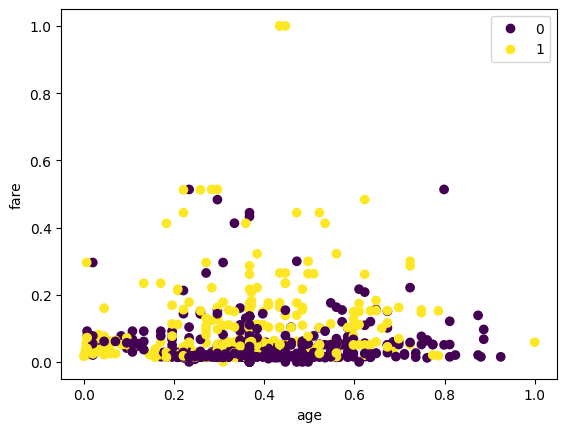

In [136]:
plt.figure()
scatter = plt.scatter(df['age'],df['fare'],c=df['survived'])
plt.xlabel('age')
plt.ylabel('fare')
plt.legend(*scatter.legend_elements())
plt.show()

**En este punto, estaríamos listos para el algoritmo de Machine Learning**

# ⭕ Práctica: Dateset PIMA

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. **Missing values are believed to be encoded with zero values**. The variable names are as follows:

    Number of times pregnant.
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    Diastolic blood pressure (mm Hg).
    Triceps skinfold thickness (mm).
    2-Hour serum insulin (mu U/ml).
    Body mass index (weight in kg/(height in m)^2).
    Diabetes pedigree function.
    Age (years).
    Class variable (0 or 1).

Más información: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [89]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
df = pd.read_csv(url,header=None)

df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


⭕ Ejercicio 1

* Modificar el nombre de las columnas de acuerdo a la información anterior.

* Hacer un análisis exploratorio:
    * ¿Qué tipo de variable es cada columna?
    * ¿Hay datos faltantes en alguna columna? Toma en cuenta la información del dataset y auxiliate de histogramas y otras herramientas exploratorias.
    * ¿Qué variable tiene más datos faltantes?
    * ¿Qué rango tienen los datos en cada columna?

⭕ Ejercicio 2

Realizar las siguientes tareas de preprocesamiento:

* Para lididar con los valores faltantes hay dos opciones: Eliminar los renglones con valores faltantes o imputarlos. ¿Cuál eliges y por qué? Realiza esta tarea en todas las columnas.
* Filtrar los valores del BMI en algún rango de tu elección.
* Normalizar todos los valores continuos.
* Cambiar las variables categóricas por *one-hot*